In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb 
import catboost as catb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

np.__version__

'1.26.4'

In [2]:
import os

root = '../parsing_results/csv'
files = os.listdir('../parsing_results/csv')

df_0 = pd.read_csv(f'{root}/{files[0]}')
df_1 = pd.read_csv(f'{root}/{files[1]}')

df_0.head()



,numrooms,squaremeters,numberoffloors,floor,price,district,street,builtyear,ceilinghight,isnewbuilding,seller,bathroomtype,residentialcomplex,repaired,city
0,4,160.85,NaN,NaN,129645100,бостандыкский,NaN,2025,3.0,True,новостройка,2 с/у и более,verdi,NaN,Алматы
1,2,72.00,NaN,NaN,79200000,NaN,NaN,2024,3.0,True,новостройка,2 с/у и более,boulevard residence,NaN,Алматы
2,1,38.30,NaN,NaN,25929100,жетысуский,NaN,2025,3.0,True,новостройка,совмещенный,rams saiahat,NaN,Алматы
3,6,340.60,NaN,NaN,161785000,бостандыкский,NaN,2013,3.0,True,новостройка,2 с/у и более,тан нуры,NaN,Алматы
4,3,87.00,16.0,5.0,90000000,бостандыкский,NaN,2019,3.0,False,крыша агент,2 с/у и более,дом на абая,NaN,Алматы


In [3]:
df = pd.concat([df_0, df_1])
df.shape

(36325, 15)

In [4]:

df.head()

,numrooms,squaremeters,numberoffloors,floor,price,district,street,builtyear,ceilinghight,isnewbuilding,seller,bathroomtype,residentialcomplex,repaired,city
0,4,160.85,NaN,NaN,129645100,бостандыкский,NaN,2025,3.0,True,новостройка,2 с/у и более,verdi,NaN,Алматы
1,2,72.00,NaN,NaN,79200000,NaN,NaN,2024,3.0,True,новостройка,2 с/у и более,boulevard residence,NaN,Алматы
2,1,38.30,NaN,NaN,25929100,жетысуский,NaN,2025,3.0,True,новостройка,совмещенный,rams saiahat,NaN,Алматы
3,6,340.60,NaN,NaN,161785000,бостандыкский,NaN,2013,3.0,True,новостройка,2 с/у и более,тан нуры,NaN,Алматы
4,3,87.00,16.0,5.0,90000000,бостандыкский,NaN,2019,3.0,False,крыша агент,2 с/у и более,дом на абая,NaN,Алматы


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36325 entries, 0 to 18322
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   numrooms            36325 non-null  int64  
 1   squaremeters        36325 non-null  float64
 2   numberoffloors      33866 non-null  float64
 3   floor               34305 non-null  float64
 4   price               36325 non-null  int64  
 5   district            35060 non-null  object 
 6   street              0 non-null      float64
 7   builtyear           36325 non-null  int64  
 8   ceilinghight        30388 non-null  float64
 9   isnewbuilding       36325 non-null  bool   
 10  seller              36325 non-null  object 
 11  bathroomtype        26891 non-null  object 
 12  residentialcomplex  22454 non-null  object 
 13  repaired            10242 non-null  object 
 14  city                36325 non-null  object 
dtypes: bool(1), float64(5), int64(3), object(6)
memory usage: 

In [6]:
df = df.drop(columns=['street'])

In [7]:
df.head()

,numrooms,squaremeters,numberoffloors,floor,price,district,builtyear,ceilinghight,isnewbuilding,seller,bathroomtype,residentialcomplex,repaired,city
0,4,160.85,NaN,NaN,129645100,бостандыкский,2025,3.0,True,новостройка,2 с/у и более,verdi,NaN,Алматы
1,2,72.00,NaN,NaN,79200000,NaN,2024,3.0,True,новостройка,2 с/у и более,boulevard residence,NaN,Алматы
2,1,38.30,NaN,NaN,25929100,жетысуский,2025,3.0,True,новостройка,совмещенный,rams saiahat,NaN,Алматы
3,6,340.60,NaN,NaN,161785000,бостандыкский,2013,3.0,True,новостройка,2 с/у и более,тан нуры,NaN,Алматы
4,3,87.00,16.0,5.0,90000000,бостандыкский,2019,3.0,False,крыша агент,2 с/у и более,дом на абая,NaN,Алматы


In [8]:
cat_cols = [
    'district',
    'seller',
    'bathroomtype',
    'repaired',
    'isnewbuilding',
    'city',
]

num_cols = [
    'numrooms',
    'squaremeters',
    'numberoffloors',
    'floor',
    'price',
    'builtyear',
    'ceilinghight',
]

In [9]:
def barplot_col(col):
    bathroom_counts = df[col].value_counts()

    # Plot the bar plot
    plt.bar(bathroom_counts.index, bathroom_counts.values)

    # Customize the plot
    plt.title(f'{col.capitalize()}s')
    plt.xlabel(f'{col.capitalize()}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary for better readability
    # Display the plot
    plt.show()
    


In [11]:
for col in cat_cols:
    print(df[col].value_counts())

district
есильский        6593
алматы           5336
бостандыкский    5025
ауэзовский       2924
алмалинский      2601
сарыарка         2294
нура             2222
медеуский        1739
алатауский       1680
наурызбайский    1651
р-н              1079
турксибский      1051
жетысуский        863
в                   1
на                  1
Name: count, dtype: int64
seller
хозяин недвижимости    17657
специалист             14101
новостройка             2859
крыша агент             1708
Name: count, dtype: int64
bathroomtype
совмещенный      14191
раздельный        6512
2 с/у и более     6133
другой              51
общий                4
Name: count, dtype: int64
repaired
дргуой ремонт           3047
черновая отделка        2612
свежий ремонт            800
требует ремонта          769
после ремонта            588
хороший ремонт           552
дизайнерский ремонт      519
евроремонт               509
качественный ремонт      442
капитальный ремонт       204
предчистовая отделка     200
Name

In [16]:
almaty_districts = [
    'алатауский',
    'алмалинский',
    'ауэзовский',
    'бостандыкский',
    'жетысуский',
    'медеуский',
    'наурызбайский',
    'турксибский'
]

astana_dstricts = ['алматинский', 'байконурский', 'есильский', 'нуринский', 'сарыаркинский']



['алатауский',
 'алмалинский',
 'ауэзовский',
 'бостандыкский',
 'жетысуский',
 'медеуский',
 'наурызбайский',
 'турксибский']

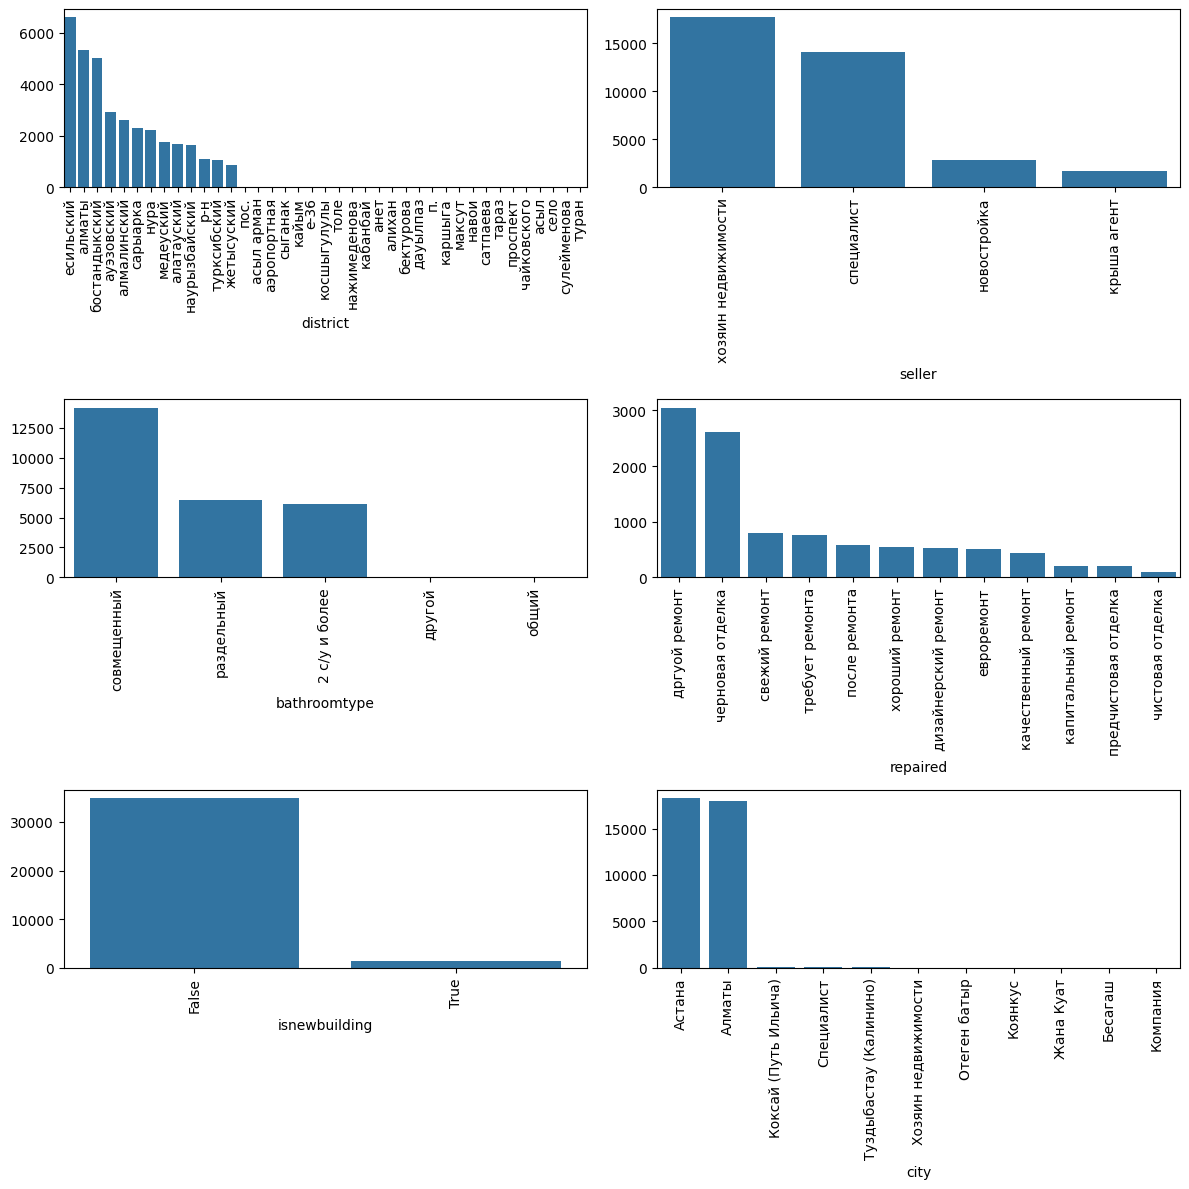

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()
'''
0 0 0, 0 1 1
1 0 2, 1 1 3
2 0 4, 2 1 5

'''

for i, col in enumerate(cat_cols):
    count_cols = df[col].value_counts()
    # ax = axs[i // 2, i % 2]
    # ax.bar(count_cols.index, count_cols.values)
    
    ax = axs[i]
    sns.barplot(x=count_cols.index, y=count_cols.values, ax=ax)
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

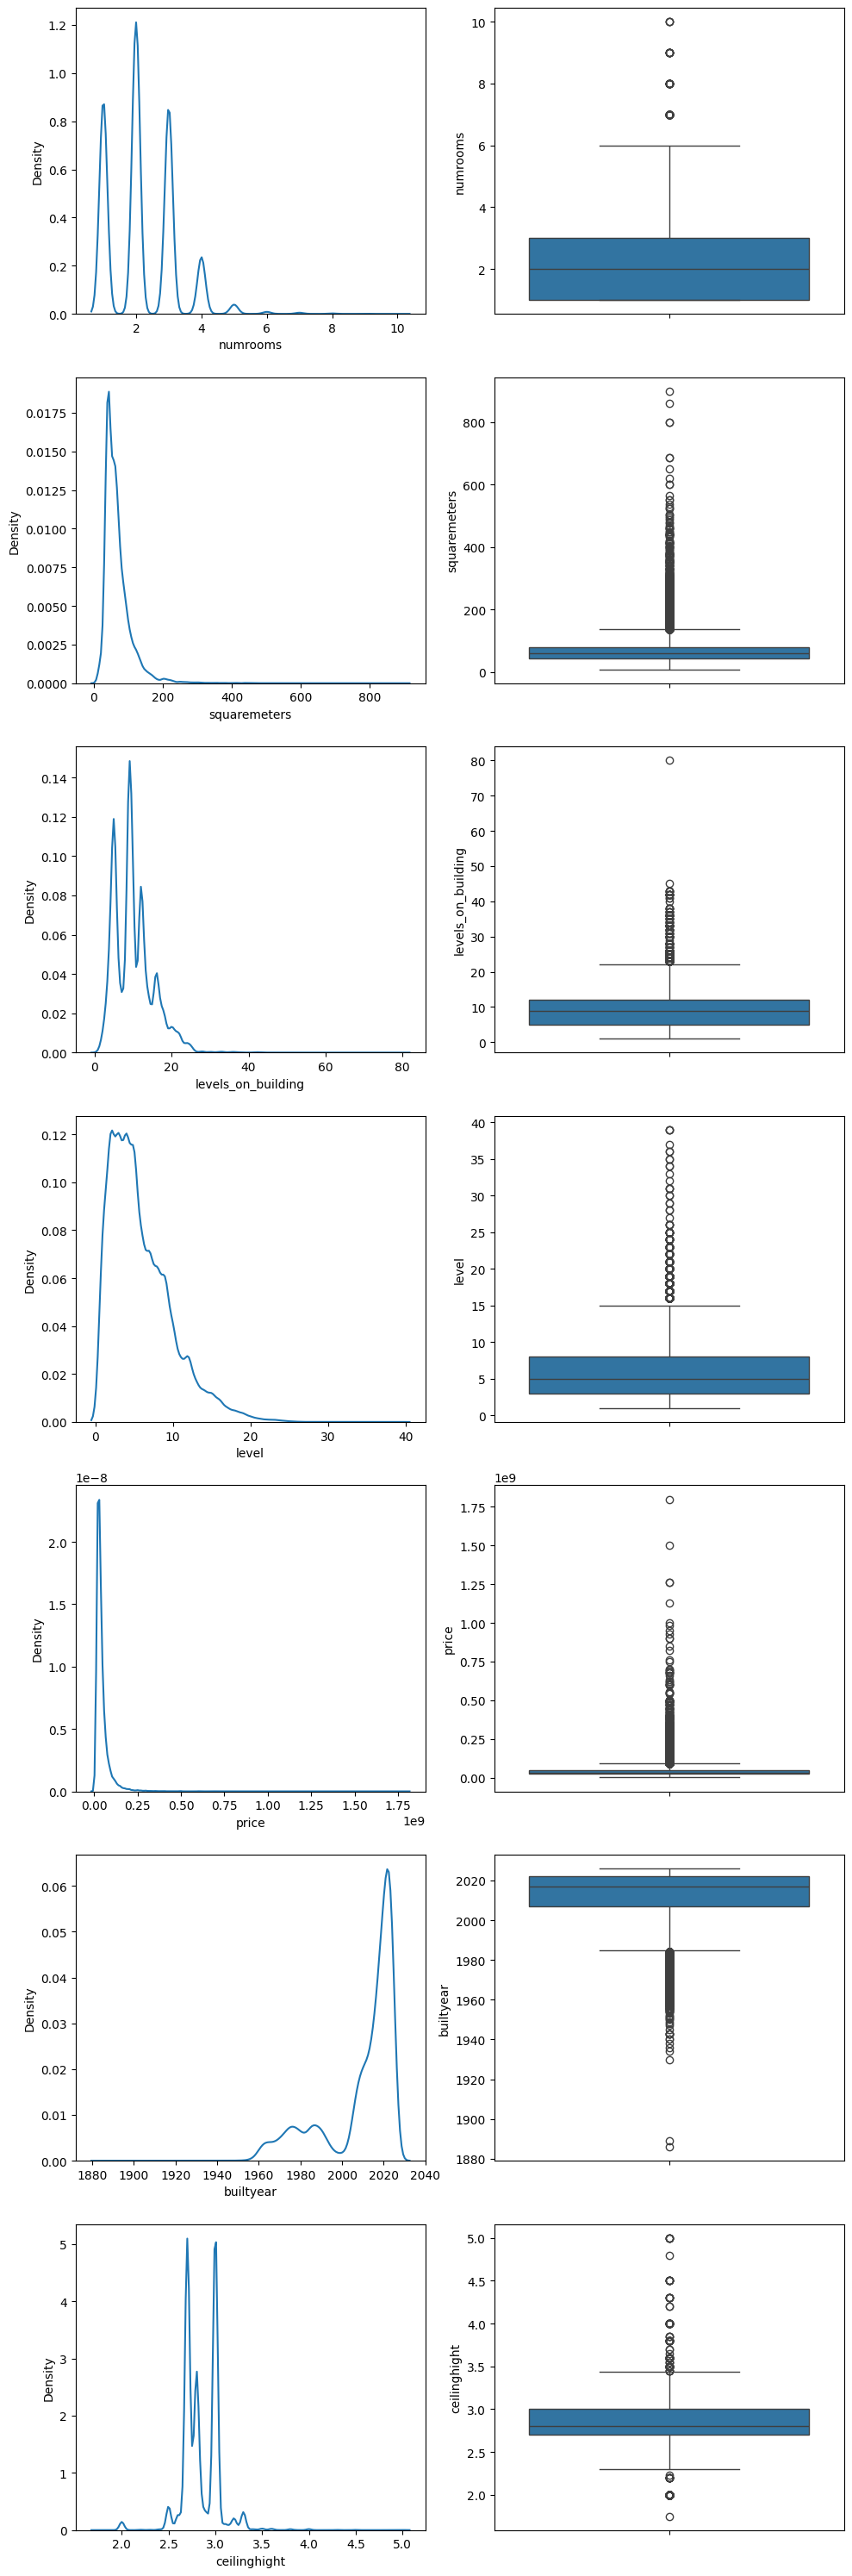

In [13]:
fig, axs = plt.subplots(len(num_cols), 2, figsize=(10, 30))

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df[col], ax=axs[i, 0])
    sns.boxplot(data=df[col], ax=axs[i, 1])
plt.tight_layout()
plt.show()

In [14]:
df['price'].max()

1800000000

In [15]:
def capcap(col, df_skew=df):
    #finding the Q1(25 percentile) and Q3(75 percentile)
    q1 = df_skew[col].quantile(0.25)
    q2 = df_skew[col].quantile(0.75)
    
    #finding out the value of Inter Quartile Range
    IQR = q2 - q1
    
    #defining max and min limits
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR) 
    
    #capping
    df_skew_new = pd.DataFrame(np.where(df_skew["Fare"] > max_limit, max_limit, 
         (np.where(df_skew["Fare"] < min_limit, min_limit, df_skew["Fare"]))), columns=["Fare"])
    
    return df_skew_new

